<a href="https://colab.research.google.com/github/dcovarru/investmentsPython/blob/master/investments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generation of Investment Data with Python
## Author: Daniel Covarrubias

# Introduction

# This one is for the Raza


In [0]:
########################
#
# 1) Identify Symbols form API dumbstock
# 2) Pull daily Price Data for last 365 days via Yahoo
# 3) Identify Metric(s)
# 4) Identify correlations/significance
# 5) Build Historical Model on Training Set
# 6) Test Model on recent data
# 7) Use TF or sklearn
# 8) Build App on AWS or GCP to monitor realtime data
#
########################

In [0]:
########################
# Load packages 
########################

import pandas as pd
import datetime
import numpy as np
import pandas_datareader
import pandas_datareader.data as web
from pandas_datareader.data import get_quote_yahoo
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import os
import re


ModuleNotFoundError: ignored

In [0]:
########################
# Get Ticker Data 
########################

investData = pd.read_csv('https://dumbstockapi.com/stock?format=csv&countries=US')

In [0]:
pd.DataFrame(investData).shape
investData.shape
investDataSubset = investData.ticker.loc[33:100]
# list(investDataSubset)
investDataSubsetDF = pd.DataFrame(investDataSubset)
# str(investDataSubset.loc[0])
investDataSubsetDF.columns.str.strip()
# investDataSubsetDF

Index(['ticker'], dtype='object')

In [0]:
#Python program to check if a string contains
#any special characters or not
# import required package
import re 
  
# Function checks if the input string(test)
# contains any special character or not
def check_splcharacter(test): 
  
    # Make an RE character set and pass  
    # this as an argument in compile function
 
    string_check= re.compile('[@_!#$%^&*()<>?/\|}{~:]') 
      
    # Pass the string in search function  
    # of RE object (string_check).
    # print(test.ticker) 
    # NOTE: the below code relies on extracting text from the ticker attribute
    if(string_check.search(test.ticker) == None): 
        #print(str(test))
        return("noSC")
          
    else:
        #print(str(test)) 
        return("SC") 


In [0]:
investDataSubsetDF['SCFlag'] = investDataSubsetDF.apply(check_splcharacter, axis = 1)
# investDataSubsetDF.apply(check_splcharacter, axis = 1)
## check_splcharacter(investDataSubset[33])
investDataSubsetDF

ticker SCFlag
33   ABR^B     SC
34   ABR^C     SC
35     ABT   noSC
36    ABTX   noSC
37    ABUS   noSC
..     ...    ...
96    ADRD   noSC
97    ADRE   noSC
98    ADRO   noSC
99    ADRU   noSC
100    ADS   noSC

[68 rows x 2 columns]

In [0]:
######################################
# need to address instances where ticker does not exist 
######################################

# get_data_yahoo() now treats 'null' strings as missing values (GH342)

start = datetime.datetime(2018, 5, 1)
end = datetime.datetime(2018, 5, 30)

def get_data(ticker):
    try:
        # df = pandas_datareader.data.DataReader('%s' % (ticker), 'morningstar', start, end, retry_count=0)
        df = web.get_quote_av(ticker, api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
        print(df.tail(5))
    except ValueError:
        print('Ticker Symbol %s is not available!' % (ticker))

# get_data('TSLA') #valid Symbol
get_data('yyfy') #not a valid Symbol
# get_data('AAPL') #valid Symbol
# get_data('QQQQ') #not a valid Symbol

KeyError: ignored

In [0]:
## 02/05/2020

#ALPHAVANTAGE_API_KEY = 'ANBKAAOU9YDNYBRV'
#keyValue = os.getenv(ALPHAVANTAGE_API_KEY)
## os.environ['ALPHAVANTAGE_API_KEY'] = 'ANBKAAOU9YDNYBRV'
### get_quote_yahoo('AGRX').price
### get_quote_yahoo('WORK').price
#pd.concat('WORK', web.DataReader('WORK', 'yahoo', '2019-10-01'))
outDF = web.DataReader('WORK', 'yahoo', '2019-10-01')
outDF.assign(Stock = 'WORK')
# len(get_quote_yahoo(investData.ticker[3]))
## web.get_quote_av(["AAPL"], api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
## web.get_quote_av(["AAPL", "TSLA"])
# os.getcwd()
## os.getenv('ALPHAVANTAGE_API_KEY')
## web.get_sector_performance_av()
# alphaVantage API Key: ANBKAAOU9YDNYBRV
## investDataSubsetDF_clean =  investDataSubsetDF[investDataSubsetDF['SCFlag'] == 'noSC']
## web.DataReader('gs', 'iex-tops')
## web.get_quote_av(["AAPL", "TSLA"])

High        Low       Open  ...    Volume  Adj Close  Stock
Date                                         ...                            
2019-10-01  24.070000  22.610001  24.070000  ...   8546700  22.870001   WORK
2019-10-02  23.490000  22.120001  22.270000  ...   6648800  23.430000   WORK
2019-10-03  25.420000  22.530001  23.340000  ...  16875200  24.930000   WORK
2019-10-04  25.209999  24.230000  25.100000  ...   6648800  24.969999   WORK
2019-10-07  26.280001  24.570000  24.620001  ...   7737100  26.049999   WORK
...               ...        ...        ...  ...       ...        ...    ...
2020-01-30  20.730000  20.110001  20.620001  ...   6295300  20.639999   WORK
2020-01-31  20.780001  20.200001  20.510000  ...   5398800  20.730000   WORK
2020-02-03  21.100000  20.264999  20.780001  ...   6471900  20.980000   WORK
2020-02-04  23.590000  21.549999  21.549999  ...  20607300  23.250000   WORK
2020-02-05  23.660000  22.530001  23.360001  ...  12365649  23.309999   WORK

[88 rows x 7 columns]

In [0]:
investDataSubsetDF_clean['ticker'].iloc[13]

'ACCP'

In [0]:
###################################
# Need code to extract tickers with recent data
# and extract tickers with SPECIAL CHARACTERS
# Data as of Today() - 1
###################################

dataMostRecent = []
dataMostRecent = web.get_quote_av(list(investDataSubsetDF_clean['ticker'][14:20]), api_key = os.getenv('ALPHAVANTAGE_API_KEY'))
dataMostRecent

NameError: ignored

In [0]:
df['add'] = df.apply(np.sum, axis = 1)

NameError: ignored

In [0]:
#########################
# Get Current Prices
# Note that if a Ticker does not have a price, the FOR LOOP will break due to lack of missing Date/PRICE element
#########################

outDF = []

for x in investDataSubset[0]:  
    # print(get_quote_yahoo(x).price)
    outDF = get_quote_yahoo(x)
    # print(x)
    # print(tmp)
    # dfTickerPrice = get_quote_yahoo(x).price
    # calPerChange = (df.Close - df.Open)/df.Open
    # outDF.append(calPerChange)
# return calPerChange
# outDF

In [0]:
outDF

language region quoteType  ...     market esgPopulated  price
A    en-US     US    EQUITY  ...  us_market        False  90.12

[1 rows x 71 columns]

In [0]:
#########################
# Extract Single Ticker
#########################

investData.loc[investData.ticker == 'IBIO']
myTicker = investData.loc[investData.ticker == 'IBIO'].ticker
myTicker

3164    IBIO
Name: ticker, dtype: object

In [0]:
#########################
# Create Array with Tickers
# Run from here
#########################

myTickers = ['AGRX', 'ONTX', 'IBIO', 'SRRA', 'OBSV']
myTickers

['AGRX', 'ONTX', 'IBIO', 'SRRA', 'OBSV']

In [0]:
#########################
# Extract Single Series
#########################

start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 1, 11)

#########################
# here arbirtraty ticker input
# note that excluding "end" will extract current data
#########################

df = web.DataReader(myTicker, 'yahoo', start)
# df.describe()

In [0]:
#########################
# Extract Multiple Series
#########################

outDF = []

for i in myTickers:  
    df = web.DataReader(myTickers, 'yahoo', start)
    calPerChange = (df.Close - df.Open)/df.Open
    # outDF.append(calPerChange)
# return calPerChange
# outDF

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013D6A9AE7F0>,
      dtype=object)

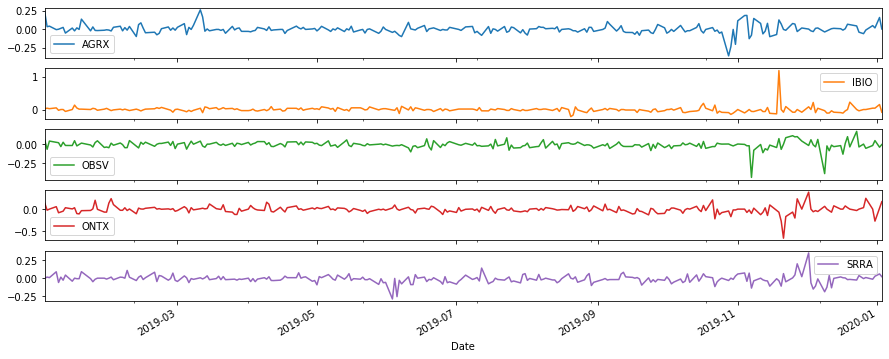

In [0]:
# calPerChange = []
calPerChange.head()
calPerChange.plot(subplots=True, figsize=(15,6))

In [0]:
corr = calPerChange.corr()
corr

Symbols      AGRX      IBIO      OBSV      ONTX      SRRA
Symbols                                                  
AGRX     1.000000  0.189370  0.145480  0.036127  0.094584
IBIO     0.189370  1.000000  0.119095 -0.011522 -0.013720
OBSV     0.145480  0.119095  1.000000  0.023037  0.235235
ONTX     0.036127 -0.011522  0.023037  1.000000  0.209527
SRRA     0.094584 -0.013720  0.235235  0.209527  1.000000

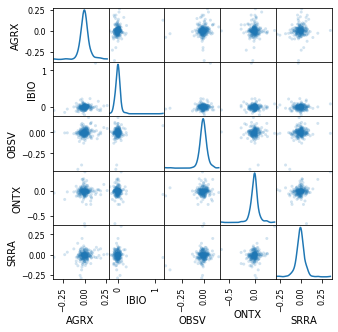

In [0]:
scatter_matrix(calPerChange, diagonal='kde', alpha=0.2, figsize=(5, 5));

Text(0, 0.5, 'Returns SRRA')

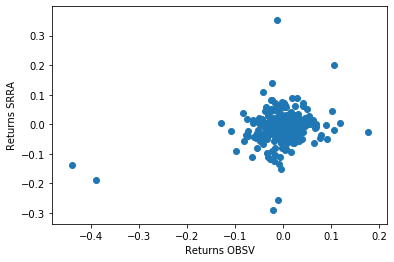

In [0]:
plt.scatter(calPerChange.OBSV, calPerChange.SRRA)
plt.xlabel('Returns OBSV')
plt.ylabel('Returns SRRA')

Text(0, 0.5, 'Returns IBIO')

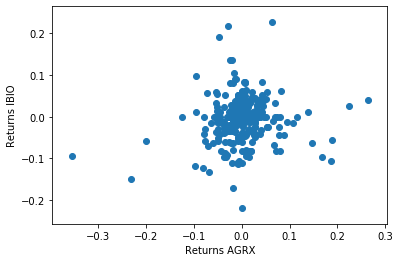

In [0]:
#########################
# One outlier, remove
#########################

calPerChange2 = calPerChange[calPerChange.IBIO < 1]

plt.scatter(calPerChange2.AGRX, calPerChange2.IBIO)
plt.xlabel('Returns AGRX')
plt.ylabel('Returns IBIO')

In [0]:
#########################
# some calculated values 
#########################

# calPerChange = (outDF.Close - outDF.Open)/outDF.Open
# calPerChange
# calPerChange = calPerChange.rename(columns={"IBIO": "PerChange"})
# list(outDF.columns) 

In [0]:
# calPerChange.pivot_table(index='Date',columns='Stock',values='PerChange',aggfunc='sum').plot()

In [0]:
#########################
# some calculated values 
#########################

close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.head()

Symbols     IBIO
Date            
2018-01-02   NaN
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN
2018-01-08   NaN

In [0]:
#########################
# join DF's 
#########################

dfMerge = df.merge(calPerChange, left_on = 'Date', right_on = 'Date')
# list(dfMerge.columns)
dfMerge.tail()

(Adj Close, IBIO)  (Close, IBIO)  (High, IBIO)  (Low, IBIO)  \
Date                                                                      
2019-12-23              0.250          0.250        0.2700       0.2300   
2019-12-24              0.240          0.240        0.2500       0.2300   
2019-12-26              0.230          0.230        0.2400       0.2200   
2019-12-27              0.230          0.230        0.2400       0.2200   
2019-12-30              0.253          0.253        0.2625       0.2301   

            (Open, IBIO)  (Volume, IBIO)  PerChange  
Date                                                 
2019-12-23          0.25       6314800.0   0.000000  
2019-12-24          0.25       1628200.0  -0.040000  
2019-12-26          0.23       2195500.0   0.000000  
2019-12-27          0.23       2795500.0   0.000000  
2019-12-30          0.24       5165363.0   0.054167

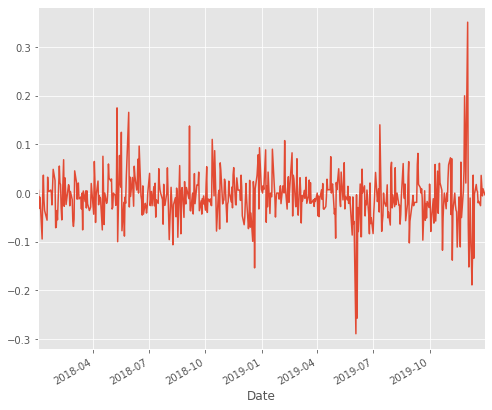

In [0]:
#########################
# create Chart
# with Chart formatting
#########################

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# close_px.plot(label='AGRX')
# mavg.plot(label='Adj Close')
# plt.legend()

dfMerge.PerChange.plot()

In [0]:
dfMerge.tail()

(Adj Close, SRRA)  (Close, SRRA)  (High, SRRA)  (Low, SRRA)  \
Date                                                                      
2019-12-23             0.3380         0.3380         0.347       0.3210   
2019-12-24             0.3420         0.3420         0.344       0.3210   
2019-12-26             0.3400         0.3400         0.344       0.3300   
2019-12-27             0.3400         0.3400         0.345       0.3310   
2019-12-30             0.3388         0.3388         0.340       0.3253   

            (Open, SRRA)  (Volume, SRRA)  PerChange  
Date                                                 
2019-12-23         0.347         1525800  -0.025937  
2019-12-24         0.330         1177000   0.036364  
2019-12-26         0.342         1040700  -0.005848  
2019-12-27         0.337         1350000   0.008902  
2019-12-30         0.340         1126159  -0.003529